<a href="https://colab.research.google.com/github/Git-Hub-Collaboration/MSC-Collaboration-V1/blob/test/Datascience_Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
1. Preprocessing:
2. Visualization:
3. Modeling:

In [9]:
print("Group Members")
print("Edna")
print("Eric M")
print("Kimanzi")
print("Felix")
print("Eve")
print("Samson")
print("Peter")
print("Denis")

Group Members
Edna
Eric M
Kimanzi
Felix
Eve
Samson
Peter
Denis


In [10]:
!git config --global user.name "mwenda-eric"
!git config --global user.email "eric.mwenda@icloud.com"
!git config --global user.password " "

In [11]:
token = ' '
username = 'menda-eric'
repo = 'MSC-Collaboration'

# Data Preprocessing
- Dedan
- Richard
- Felix

# Data Visualizations:
- Eric
- Evelyn
- Denis

# Modelling Section
- Samson
- Peter
- Edna


#1.Samson's Work

##a.Data Preprocessing

In [12]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [13]:
import os
os.listdir()

['.config', 'sample_data']

In [14]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [15]:
data =  pd.read_csv("/content/drive/MyDrive//df1_loan.csv")

In [16]:
data.head(5)

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


In [17]:
# check shape of the data
data.shape

(500, 15)

In [18]:
# checking null values in varies Columns of our Dataset
data.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

In [19]:
# Drop unnecessary columns
data = data.drop(columns=['Unnamed: 0', 'Loan_ID'])

In [20]:
# Remove dollar sign from 'Total_amount' column
data['Total_Income'] = data['Total_Income'].str.replace('$', '')

# Convert 'Total_amount' column to numeric
data['Total_Income'] = pd.to_numeric(data['Total_Income'])

In [21]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [22]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
data['LoanAmount'] = imputer.fit_transform(data['LoanAmount'].values.reshape(-1, 1))
data['Loan_Amount_Term'] = imputer.fit_transform(data['Loan_Amount_Term'].values.reshape(-1, 1))
data['Credit_History'] = imputer.fit_transform(data['Credit_History'].values.reshape(-1, 1))
data['Self_Employed'] = imputer.fit_transform(data['Self_Employed'].values.reshape(-1, 1))
data['Married'] = imputer.fit_transform(data['Married'].values.reshape(-1, 1))
data['Dependents'] = imputer.fit_transform(data['Dependents'].values.reshape(-1, 1))
data['Gender'] = imputer.fit_transform(data['Gender'].values.reshape(-1, 1))








In [23]:
# view the new data
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1.0,0.0,0.0,0,0.0,5849,0.0,144.020747,360.0,1.0,2,1,5849.0
1,1.0,1.0,1.0,0,0.0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0
2,1.0,1.0,0.0,0,1.0,3000,0.0,66.000000,360.0,1.0,2,1,3000.0
3,1.0,1.0,0.0,1,0.0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0
4,1.0,0.0,0.0,0,0.0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0


In [24]:
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = data.drop(columns=['Loan_Status'])
y = data['Loan_Status']

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##2.Visualizations

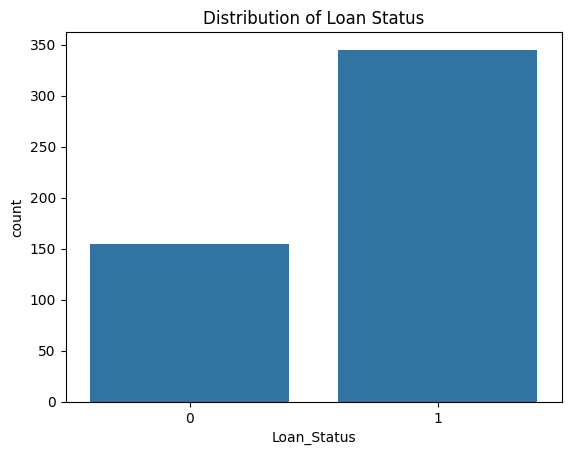

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore the distribution of the target variable
sns.countplot(x='Loan_Status', data=data)
plt.title('Distribution of Loan Status')
plt.show()



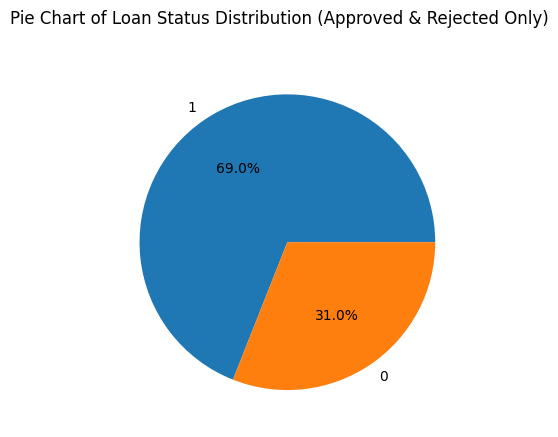

In [29]:
approved_rejected = data[data['Loan_Status'].isin(['Y', 'N'])]
loan_counts = data['Loan_Status'].value_counts().reset_index()
loan_counts.columns = ['Loan Status', 'Number of Applicants']
plt.pie(loan_counts['Number of Applicants'], labels=loan_counts['Loan Status'], autopct='%1.1f%%')
plt.suptitle('Pie Chart of Loan Status Distribution (Approved & Rejected Only)')
plt.show()

##c.Modelling Using Various Classification Algorithms

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [31]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


Logistic Regression Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.79      0.35      0.49        31
           1       0.77      0.96      0.85        69

    accuracy                           0.77       100
   macro avg       0.78      0.66      0.67       100
weighted avg       0.77      0.77      0.74       100



In [32]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))


Decision Tree Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.63      0.61      0.62        31
           1       0.83      0.84      0.83        69

    accuracy                           0.77       100
   macro avg       0.73      0.73      0.73       100
weighted avg       0.77      0.77      0.77       100



In [33]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.86      0.61      0.72        31
           1       0.85      0.96      0.90        69

    accuracy                           0.85       100
   macro avg       0.85      0.78      0.81       100
weighted avg       0.85      0.85      0.84       100



In [34]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))


Naive Bayes Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.74      0.55      0.63        31
           1       0.82      0.91      0.86        69

    accuracy                           0.80       100
   macro avg       0.78      0.73      0.75       100
weighted avg       0.79      0.80      0.79       100



In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

SVM Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.69      1.00      0.82        69

    accuracy                           0.69       100
   macro avg       0.34      0.50      0.41       100
weighted avg       0.48      0.69      0.56       100



In [37]:
# Neural Network
nn_model = MLPClassifier()
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)
print("Neural Network Accuracy:", accuracy_score(y_test, nn_pred))
print(classification_report(y_test, nn_pred))

Neural Network Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.50      0.06      0.11        31
           1       0.70      0.97      0.81        69

    accuracy                           0.69       100
   macro avg       0.60      0.52      0.46       100
weighted avg       0.64      0.69      0.60       100



In [38]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
# Neural Network using TensorFlow and Keras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])





In [39]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

nn_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
print("Neural Network Accuracy:", accuracy_score(y_test, nn_pred))
print(classification_report(y_test, nn_pred))

4/4 [==============================] - 0s 4ms/step
Neural Network Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.84      0.68      0.75        31
           1       0.87      0.94      0.90        69

    accuracy                           0.86       100
   macro avg       0.85      0.81      0.83       100
weighted avg       0.86      0.86      0.86       100



In [40]:
from xgboost import XGBClassifier

# XGBoost
xgb_model =XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

XGBoost Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.63      0.55      0.59        31
           1       0.81      0.86      0.83        69

    accuracy                           0.76       100
   macro avg       0.72      0.70      0.71       100
weighted avg       0.75      0.76      0.76       100

